In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load it into a Jupyter Notebook.
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Exploring the dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Null
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization

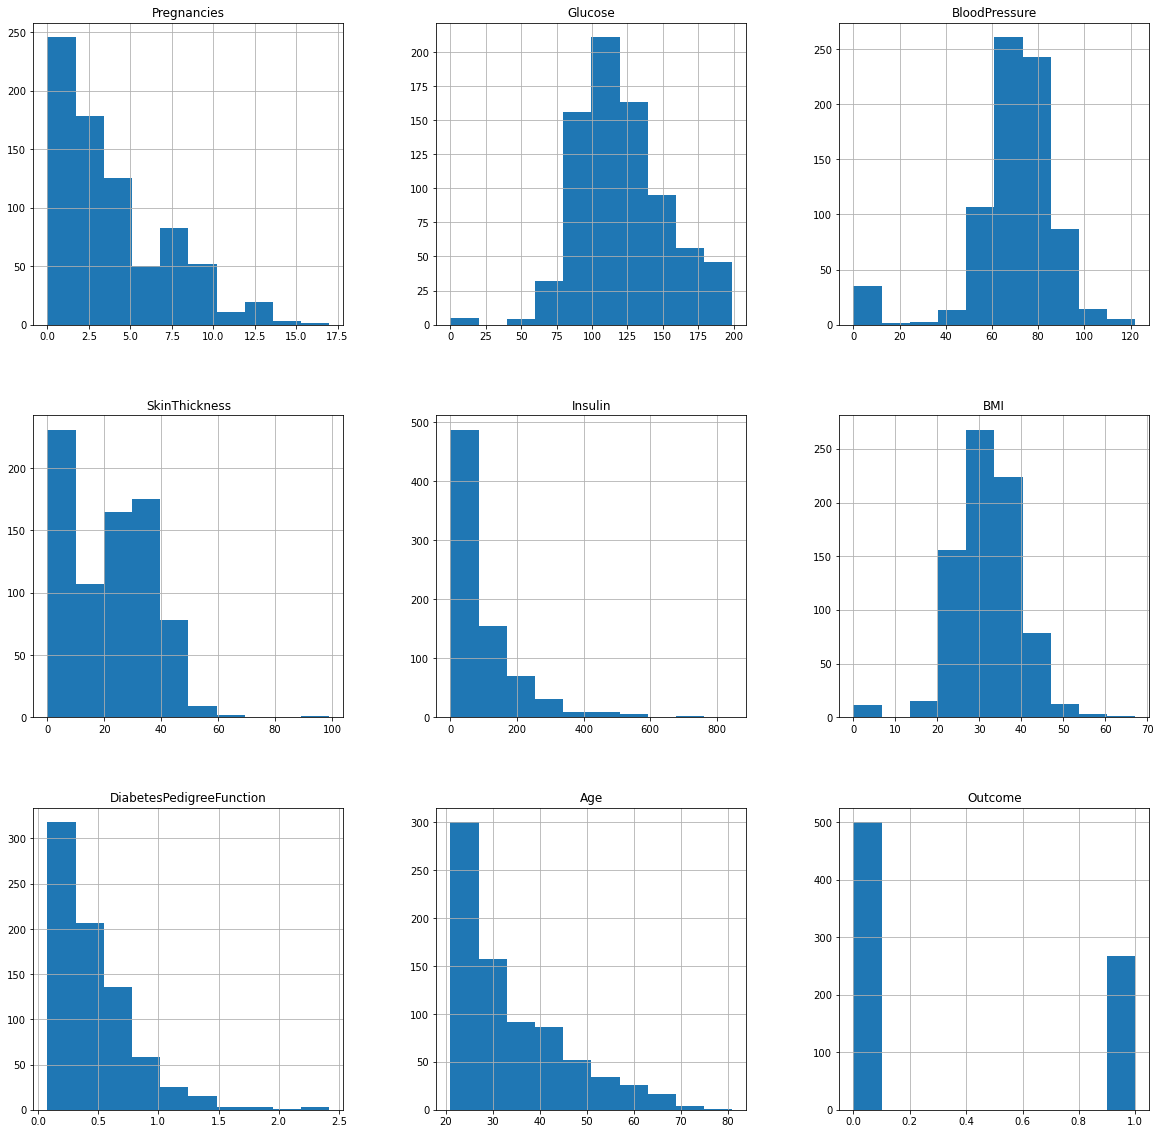

In [8]:
p = diabetes_df.hist(figsize = (20,20))

# Model Building
Splitting the dataset

In [9]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [10]:
# Split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

# Decision Tree

In [35]:
# Train a decision tree classifier that is pruned at a depth of 6.¶
from sklearn.tree import DecisionTreeClassifier
clf_d=DecisionTreeClassifier(max_depth=3, random_state=0) 
clf_d.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

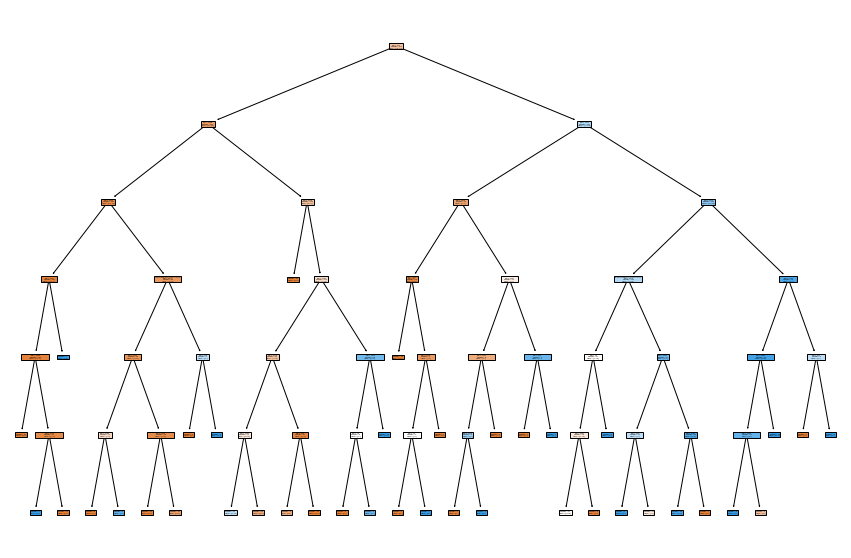

In [36]:
# Visualise the tree
from sklearn import tree
diabetesfig=plt.figure(figsize=(15,10))
_=tree.plot_tree(clf_d,filled=True,feature_names=X_train.columns)
# save to file
diabetesfig.savefig("diabetestree.png")

In [37]:
# The accuracy score for Decision Tree
from sklearn import metrics
print("Accuracy on the training set:", clf_d.score(X_train, y_train))
print("Accuracy on the test set :", clf_d.score(X_test, y_test))

Accuracy on the training set: 0.8715953307392996
Accuracy on the test set : 0.7007874015748031


In [55]:
Prediction2=clf_d.predict([[3,125,68,30,120,37,0.4,28]])

In [56]:
Prediction2

array([0])

In [65]:
X_new =[[3,125,68,30,120,37,0.4,28]]

In [66]:
Prediction2=clf_d.predict(X_new)

In [60]:
Prediction2

array([0])